In [93]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# bdd 1

In [89]:
bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/nb_epochs/bdd_nb_epochs.csv", index_col=0)
bdd = bdd.sort_values(by=['dataset_name', 'max_epochs'], ascending=True)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,train_val_csv_file,train_loss,val_loss,num_outputs,git_branch
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.765178,0.002214,0.714760,0.009040,convnet,cingulate_HCP_half_1,True,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/midl2...,3.457140,2.962474,NaN,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.724701,0.003540,0.669287,0.006510,convnet,cingulate_HCP_half_1,True,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/midl2...,3.545111,2.529201,NaN,Run_03_aymeric
68,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.735087,0.004577,0.685918,0.010806,convnet,cingulate_HCP_half_1,True,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,2.306860,2.288595,NaN,Run_03_aymeric
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,1.551873,1.316173,NaN,Run_03_aymeric
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,2.175130,1.757579,NaN,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.720853,0.004433,0.733076,0.006793,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,-1,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.602328,0.947574,NaN,Run_03_aymeric
60,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.747058,0.003806,0.701053,0.008453,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,-1,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.558383,0.911198,NaN,Run_03_aymeric
101,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.744843,0.004496,0.701661,0.007056,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,-1,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.690456,0.951879,NaN,Run_03_aymeric
102,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716084,0.003883,0.732234,0.009714,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,-1,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.702846,0.919229,NaN,Run_03_aymeric


Text(0, 0.5, 'auc')

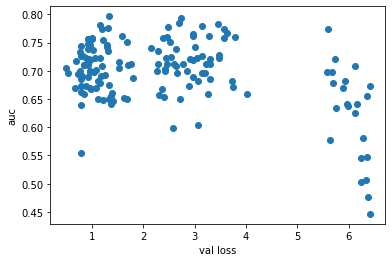

In [9]:
plt.scatter(bdd.val_loss, bdd.auc)
plt.xlabel("val loss")
plt.ylabel("auc")

In [ ]:
bdd[(bdd.max_epochs == 251) & (bdd.dataset_name == 'cingulate_UkBioBank_most_folded_551')].auc.mean()

0.7234621750069892

In [ ]:
bdd[bdd.foldlabel == False]

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,train_val_csv_file,git_branch
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
81,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.687001,0.003267,0.666292,0.006949,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
82,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716335,0.002193,0.702760,0.008781,convnet,cingulate_HCP_half_1,False,6,5,-1,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.554332,0.020763,0.607836,0.019011,pointnet,cingulate_HCP_half_1,False,10,251,-1,30,NaN,pointnet
78,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.651144,0.003759,0.661053,0.015104,convnet,cingulate_UkBioBank_most_folded_551,False,6,5,-1,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric


In [ ]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

In [ ]:
def plot_func_of_epochs(df):
    means = df.groupby('max_epochs').mean().auc
    n = means.shape[0]

    counts = df.groupby('max_epochs').count().auc
    print(counts)

    yerrs = []
    for n_epochs in df.max_epochs.unique():
        filtered_df = df[df.max_epochs == n_epochs]
        yerrs.append(confidence_interval(filtered_df.auc))

    fig, ax = plt.subplots()

    plt.grid(axis='y')
    ax.set_axisbelow(True)
    plt.bar(range(n), means)
    plt.xticks(range(n), df.max_epochs.unique())
    plt.errorbar(range(n), means, yerr=yerrs, xerr=None, ecolor='black', fmt='None')
    plt.plot()

    return means

max_epochs
1       7
5      22
25      7
125     5
251     5
Name: auc, dtype: int64


max_epochs
1      0.643889
5      0.711136
25     0.679192
125    0.670194
251    0.677408
Name: auc, dtype: float64

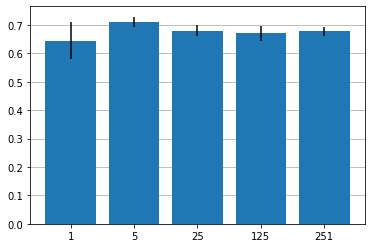

In [ ]:
# least folded brains
least_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_least_folded_551']

plot_func_of_epochs(least_folded)

max_epochs
1      11
5      11
25      7
125     5
251     5
Name: auc, dtype: int64


max_epochs
1      0.618493
5      0.739359
25     0.730130
125    0.743861
251    0.723462
Name: auc, dtype: float64

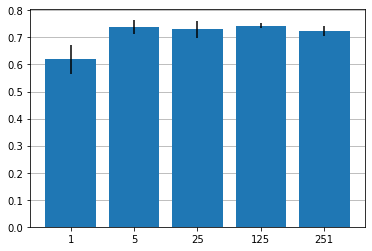

In [ ]:
# most folded brains
most_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_most_folded_551']

plot_func_of_epochs(most_folded)

max_epochs
1       5
5      13
25      6
125     5
251     8
Name: auc, dtype: int64


max_epochs
1      0.601672
5      0.714030
25     0.687363
125    0.714806
251    0.734495
Name: auc, dtype: float64

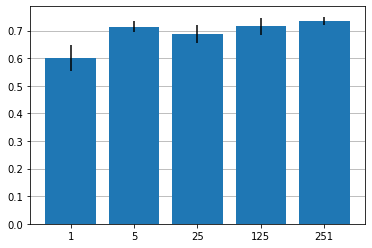

In [ ]:
# mid folded brains
mid_folded = bdd[bdd.dataset_name == 'cingulate_UkBioBank_mid_folded_551']

plot_func_of_epochs(mid_folded)

## Analysis

In [ ]:
from scipy.stats import ttest_ind

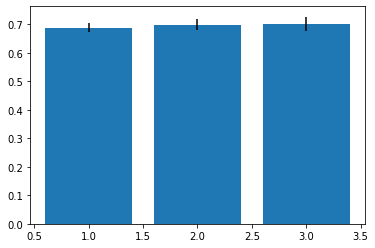

Least and mid Ttest_indResult(statistic=-0.9103125616204584, pvalue=0.3655486344742803)
Least and most Ttest_indResult(statistic=-0.9583393749858953, pvalue=0.34140135534303395)
Mid and most Ttest_indResult(statistic=0.19875362706087826, pvalue=0.8430386951543052)


In [ ]:
datasets = [least_folded, mid_folded, most_folded]

def plot_bars_with_errors(datasets, title=None):
    means = [datasets[i].auc.mean() for i in range(len(datasets))]
    X = range(1,4)

    plt.bar(X, means)

    errorbars = []

    for dataset in datasets:
        data = dataset.auc
        diff = confidence_interval(data)
        errorbars.append(diff)

    plt.errorbar(X, means, yerr=errorbars, xerr=None, ecolor='black', fmt='None')

    plt.title(title)
    plt.show()


plot_bars_with_errors(datasets)

print('Least and mid', ttest_ind(least_folded.auc, mid_folded.auc, equal_var=False))
print('Least and most', ttest_ind(least_folded.auc, most_folded.auc, equal_var=False))
print('Mid and most', ttest_ind(most_folded.auc, mid_folded.auc, equal_var=False))

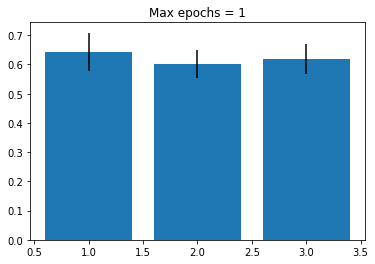

Least and mid Ttest_indResult(statistic=0.9452763816251348, pvalue=0.36693850314770804)
Least and most Ttest_indResult(statistic=0.5589464462368582, pvalue=0.5858576382900519)
Mid and most Ttest_indResult(statistic=0.43316764139327457, pvalue=0.6726569936847302)


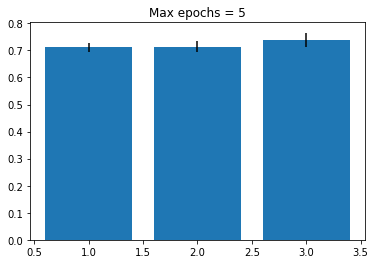

Least and mid Ttest_indResult(statistic=-0.20523196704172206, pvalue=0.8389060675118276)
Least and most Ttest_indResult(statistic=-1.68844654309995, pvalue=0.10791718692855129)
Mid and most Ttest_indResult(statistic=1.4354843123524859, pvalue=0.16692733020059095)


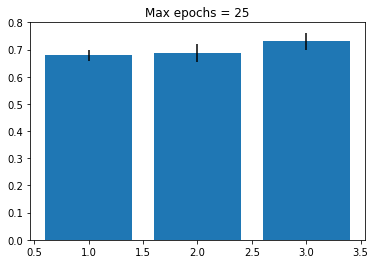

Least and mid Ttest_indResult(statistic=-0.394162569592167, pvalue=0.7031530274862974)
Least and most Ttest_indResult(statistic=-2.469791624882359, pvalue=0.033030243225199284)
Mid and most Ttest_indResult(statistic=1.7208449095741163, pvalue=0.11351433562715971)


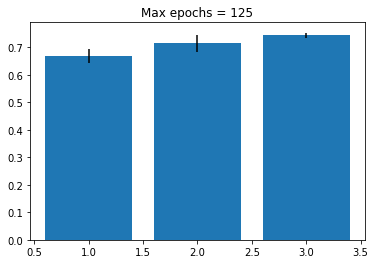

Least and mid Ttest_indResult(statistic=-1.9141338887371169, pvalue=0.0935240276136069)
Least and most Ttest_indResult(statistic=-4.70480358147686, pvalue=0.005062893758803562)
Mid and most Ttest_indResult(statistic=1.5354012555644083, pvalue=0.18860451781605211)


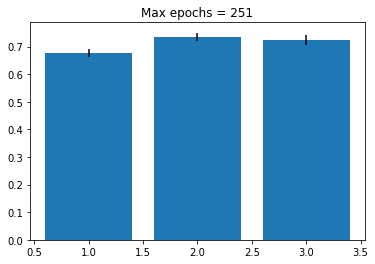

Least and mid Ttest_indResult(statistic=-4.7450991056461165, pvalue=0.0007679265811553201)
Least and most Ttest_indResult(statistic=-3.3536939839749467, pvalue=0.010733294682982722)
Mid and most Ttest_indResult(statistic=-0.8087178453577418, pvalue=0.4404761678118645)


In [ ]:
n_epochs = [1,5,25,125,251]

for n in n_epochs:
    dbs = []
    for db in [least_folded, mid_folded, most_folded]:
        db = db[db.max_epochs == n]
        dbs.append(db)
        
    plot_bars_with_errors(dbs, title=f'Max epochs = {n}')
    print('Least and mid', ttest_ind(dbs[0].auc, dbs[1].auc, equal_var=False))
    print('Least and most', ttest_ind(dbs[0].auc, dbs[2].auc, equal_var=False))
    print('Mid and most', ttest_ind(dbs[2].auc, dbs[1].auc, equal_var=False))

In [ ]:
dbs = [least_folded, mid_folded, most_folded]

for db in dbs:
    print(


SyntaxError: unexpected EOF while parsing (<ipython-input-13-721e0f0db702>, line 4)

# bdd 2

In [94]:
bdd2 = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/gyrification/bdd_gyrification.csv", index_col=0)
bdd2.seed = bdd2.seed.fillna(-1)
bdd2 = bdd2.sort_values(by=['dataset_name', 'seed'], ascending=True)
bdd2

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,max_epochs,nb_subjects,seed,train_val_csv_file,train_loss,val_loss
15,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.683022,0.005379,0.655743,0.012794,cingulate_UkBioBank_full,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.569981,0.786876
16,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.722134,0.003754,0.693123,0.008207,cingulate_UkBioBank_full,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.558440,0.922371
17,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.660963,0.006823,0.638994,0.016856,cingulate_UkBioBank_full,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.542453,1.035447
18,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.718815,0.002339,0.703368,0.008674,cingulate_UkBioBank_full,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.581225,0.896326
19,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.605671,0.011797,0.604070,0.014496,cingulate_UkBioBank_full,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.391008,1.050052
...,...,...,...,...,...,...,...,...,...,...,...,...
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781990,0.002745,0.712585,0.006795,cingulate_UkBioBank_most_folded_551,251,-1,1.0,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.901927,1.423130
6,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.645431,0.007441,0.640281,0.010962,cingulate_UkBioBank_most_folded_551,251,-1,1.0,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.661693,0.772966
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.698808,0.003932,0.626784,0.006968,cingulate_UkBioBank_most_folded_551,251,-1,1.0,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.608464,0.808280
8,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.649941,0.004769,0.646152,0.010594,cingulate_UkBioBank_most_folded_551,251,-1,1.0,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.584766,0.735708


In [96]:
bdd2.groupby(['dataset_name','seed']).auc.mean()

dataset_name                          seed
cingulate_UkBioBank_full              -1.0    0.680272
                                       1.0    0.710370
cingulate_UkBioBank_least_folded_551   1.0    0.690923
cingulate_UkBioBank_mid_folded_551     1.0    0.728604
cingulate_UkBioBank_most_folded_551    1.0    0.705804
Name: auc, dtype: float64

#### Correlation validation loss and auc

Pearson r: 0.524673028286635 ; p value 0.0002157045163643822


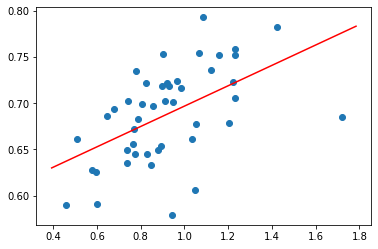

In [13]:
r,p = pearsonr(bdd2.val_loss, bdd2.auc)
print("Pearson r:", r, "; p value", p)

plt.scatter(bdd2.val_loss, bdd2.auc)

axes = plt.gca()
ymin, ymax = axes.get_ylim()
xmin, xmax = axes.get_xlim()

regline = LinearRegression()
regline.fit(bdd2.val_loss.values.reshape(-1,1), bdd2.auc.values.reshape(-1,1))
y1, y2 = regline.predict([[xmin], [xmax]])

plt.plot([xmin, xmax], [y1, y2], c='red')
plt.show()

# Full bdd

In [38]:
full_bdd = pd.concat([bdd, bdd2], axis=0)
full_bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,train_val_csv_file,train_loss,val_loss,num_outputs,git_branch,early_stopping_patience,seed
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.765178,0.002214,0.714760,0.009040,convnet,cingulate_HCP_half_1,True,6.0,5,-1,10.0,/neurospin/dico/data/deep_folding/papers/midl2...,3.457140,2.962474,NaN,Run_03_aymeric,NaN,NaN
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.724701,0.003540,0.669287,0.006510,convnet,cingulate_HCP_half_1,True,6.0,5,-1,10.0,/neurospin/dico/data/deep_folding/papers/midl2...,3.545111,2.529201,NaN,Run_03_aymeric,NaN,NaN
68,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.735087,0.004577,0.685918,0.010806,convnet,cingulate_HCP_half_1,True,6.0,5,-1,10.0,/neurospin/dico/data/deep_folding/papers/ipmi2...,2.306860,2.288595,NaN,Run_03_aymeric,NaN,NaN
79,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.734549,0.003508,0.716257,0.005491,convnet,cingulate_HCP_half_1,False,6.0,5,-1,10.0,/neurospin/dico/data/deep_folding/papers/ipmi2...,1.551873,1.316173,NaN,Run_03_aymeric,NaN,NaN
80,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.712555,0.003185,0.686456,0.012417,convnet,cingulate_HCP_half_1,False,6.0,5,-1,10.0,/neurospin/dico/data/deep_folding/papers/ipmi2...,2.175130,1.757579,NaN,Run_03_aymeric,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781990,0.002745,0.712585,0.006795,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.901927,1.423130,NaN,NaN,50.0,1.0
6,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.645431,0.007441,0.640281,0.010962,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.661693,0.772966,NaN,NaN,50.0,1.0
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.698808,0.003932,0.626784,0.006968,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.608464,0.808280,NaN,NaN,50.0,1.0
8,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.649941,0.004769,0.646152,0.010594,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.584766,0.735708,NaN,NaN,50.0,1.0


In [82]:
filtered_bdd = full_bdd[~full_bdd.dataset_name.str.contains('1114')]
filtered_bdd = filtered_bdd[filtered_bdd.max_epochs >= 125]
filtered_bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,nb_subjects,num_representation_features,train_val_csv_file,train_loss,val_loss,num_outputs,git_branch,early_stopping_patience,seed
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.554332,0.020763,0.607836,0.019011,pointnet,cingulate_HCP_half_1,False,10.0,251,-1,30.0,NaN,1.365892,0.775826,30.0,pointnet,NaN,NaN
1,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781618,0.003536,0.714994,0.007494,convnet,cingulate_HCP_half_1,True,6.0,251,-1,10.0,/neurospin/dico/data/deep_folding/papers/midl2...,0.577072,1.153862,NaN,Run_03_aymeric,NaN,NaN
147,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.710068,0.003659,0.677942,0.011920,convnet,cingulate_UkBioBank_full,True,6.0,125,551,10.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.793347,0.845211,NaN,Run_03_aymeric,NaN,NaN
148,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.709880,0.002510,0.698760,0.006784,convnet,cingulate_UkBioBank_full,True,6.0,125,551,10.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.673081,0.840224,NaN,Run_03_aymeric,NaN,NaN
149,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.733965,0.003756,0.718082,0.007221,convnet,cingulate_UkBioBank_full,True,6.0,125,551,10.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.641768,0.771076,NaN,Run_03_aymeric,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.781990,0.002745,0.712585,0.006795,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.901927,1.423130,NaN,NaN,50.0,1.0
6,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.645431,0.007441,0.640281,0.010962,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.661693,0.772966,NaN,NaN,50.0,1.0
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.698808,0.003932,0.626784,0.006968,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.608464,0.808280,NaN,NaN,50.0,1.0
8,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.649941,0.004769,0.646152,0.010594,NaN,cingulate_UkBioBank_most_folded_551,NaN,NaN,251,-1,NaN,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,0.584766,0.735708,NaN,NaN,50.0,1.0


In [66]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

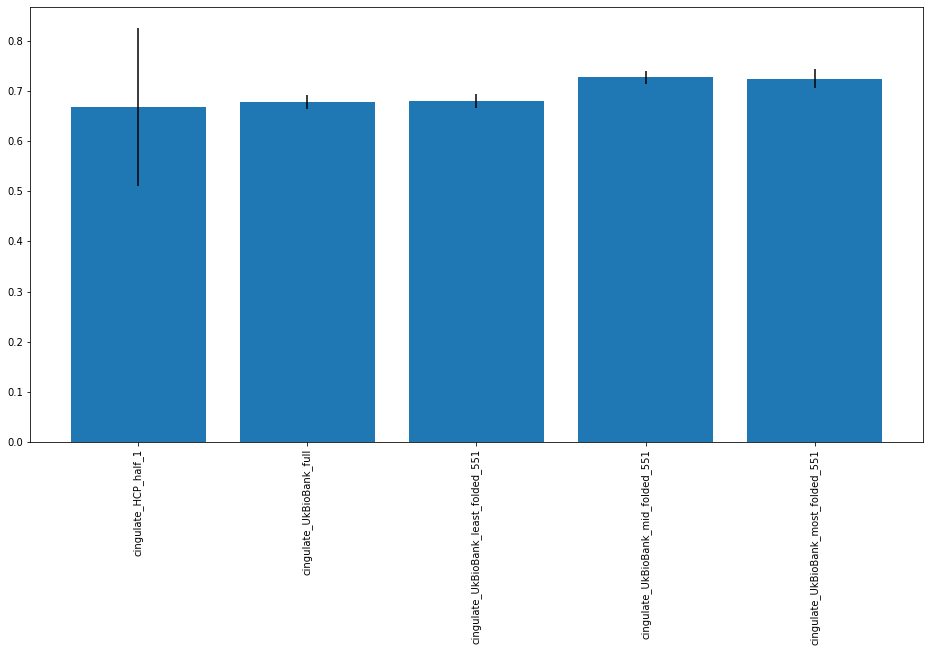

dataset_name
cingulate_HCP_half_1                     2
cingulate_UkBioBank_full                38
cingulate_UkBioBank_least_folded_551    15
cingulate_UkBioBank_mid_folded_551      18
cingulate_UkBioBank_most_folded_551     15
Name: auc, dtype: int64

In [83]:
X = filtered_bdd.dataset_name.unique()
Y = filtered_bdd.groupby('dataset_name').auc.mean()

N = filtered_bdd.groupby('dataset_name').auc.count()

err_bars = filtered_bdd.groupby('dataset_name').auc.apply(confidence_interval)


plt.figure(figsize=(16,8))
plt.bar(range(X.shape[0]), Y.values)
plt.xticks(ticks=range(X.shape[0]), labels=X, rotation=90)
plt.errorbar(range(X.shape[0]), Y.values, err_bars, fmt='none', c='black')
plt.show()

N

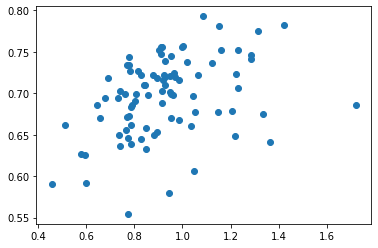

In [84]:
plt.scatter(filtered_bdd.val_loss, filtered_bdd.auc)
plt.show()

# bdd_best_models

In [20]:
bdd_bests = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/gyrification/bdd_best_models.csv", index_col=0)
#bdd_bests = bdd_bests.sort_values(by=['dataset_name'], ascending=True)
bdd_bests

,model_path,auc,auc_std,accuracy,accuracy_std,epoch,best_loss
0,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.663421,0.003296,0.657333,0.010784,187,0.464741
1,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.699833,0.003114,0.672889,0.009305,81,0.448384
2,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.568957,0.013460,0.599485,0.011498,101,0.455034
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.694170,0.004490,0.665427,0.007774,101,0.590754
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.710477,0.005223,0.700000,0.008503,74,0.646406
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.618057,0.004838,0.628515,0.010886,98,0.401701


### Compare the best models with their fully trained counterparts

In [21]:
models = bdd_bests.model_path

sub_bdd2 = bdd2[bdd2.model_path.isin(models)]
sub_bdd2

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,early_stopping_patience,max_epochs,nb_subjects,seed,train_val_csv_file,train_loss,val_loss
39,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.693872,0.002978,0.695930,0.006969,cingulate_UkBioBank_full,50,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.522499,0.677220
40,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.702794,0.003852,0.681637,0.010086,cingulate_UkBioBank_full,50,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.635386,0.741110
41,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.635786,0.009901,0.624234,0.016793,cingulate_UkBioBank_full,50,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.493687,0.739324
42,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.716034,0.005532,0.697029,0.004661,cingulate_UkBioBank_full,50,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.662268,0.984468
43,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.722329,0.005523,0.692982,0.013742,cingulate_UkBioBank_full,50,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.759003,0.826757
44,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.589923,0.010760,0.622105,0.014678,cingulate_UkBioBank_full,50,251,551,-1.0,/volatile/jc225751/Runs/52_ukbiobank/Input/UkB...,0.554316,0.456546


[]

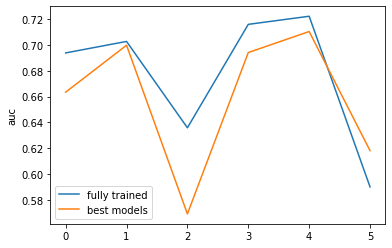

In [33]:
plt.plot(range(6), sub_bdd2.auc)
plt.plot(range(6), bdd_bests.auc)
plt.legend(["fully trained", "best models"])
plt.ylabel("auc")
plt.plot()

[]

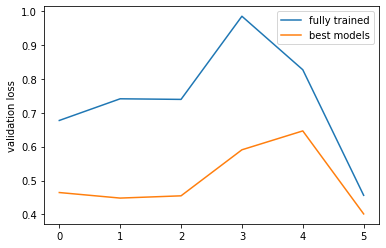

In [32]:
plt.plot(range(6), sub_bdd2.val_loss)
plt.plot(range(6), bdd_bests.best_loss)
plt.legend(["fully trained", "best models"])
plt.ylabel("validation loss")
plt.plot()

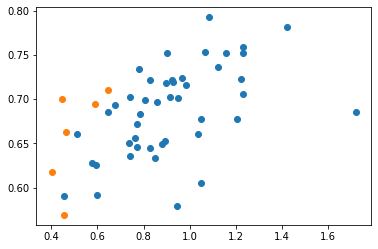

In [34]:
plt.scatter(bdd2.val_loss, bdd2.auc)
plt.scatter(bdd_bests.best_loss, bdd_bests.auc)
plt.show()